# Recurrent Neural Networks (RNN)

## Preparing

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Training the model

In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 162ms/step - loss: 0.6805 - acc: 0.5584 - val_loss: 0.6311 - val_acc: 0.6708
Epoch 2/10
157/157 [==============================] - 25s 160ms/step - loss: 0.4724 - acc: 0.7917 - val_loss: 0.4838 - val_acc: 0.7720
Epoch 3/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2874 - acc: 0.8853 - val_loss: 0.3722 - val_acc: 0.8548
Epoch 4/10
157/157 [==============================] - 25s 159ms/step - loss: 0.1871 - acc: 0.9295 - val_loss: 0.5041 - val_acc: 0.7830
Epoch 5/10
157/157 [==============================] - 25s 159ms/step - loss: 0.1128 - acc: 0.9623 - val_loss: 0.5716 - val_acc: 0.7606
Epoch 6/10
157/157 [==============================] - 25s 160ms/step - loss: 0.0638 - acc: 0.9811 - val_loss: 0.6938 - val_acc: 0.7442
Epoch 7/10
157/157 [==============================] - 25s 159ms/step - loss: 0.0369 - acc: 0.9898 - val_loss: 0.5563 - val_acc: 0.8318
Epoch 8/10
157/157 [==============================] - 2

## Plotting results

<Figure size 432x288 with 0 Axes>

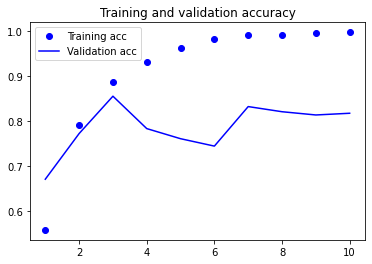

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [5]:
# 약 85%정도의 검증 정확도 달성 → 기존 모델보다 성능이 높지 않음
# 전체 시퀀스가 아니라 처음 500개의 단어만 입력에 사용했기 때문
# 이 RNN은 기준 모델보다 얻은 정보가 적음
# 다른 이유는 SimpleRNN이 텍스트처럼 긴 시퀀스를 사용하는데 적합하지 않음

## A concrete LSTM example in Keras

In [6]:
# Using the LSTM layer in Keras
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 59s 361ms/step - loss: 0.4920 - acc: 0.7659 - val_loss: 0.3301 - val_acc: 0.8640
Epoch 2/10
157/157 [==============================] - 56s 359ms/step - loss: 0.2883 - acc: 0.8871 - val_loss: 0.4142 - val_acc: 0.8392
Epoch 3/10
157/157 [==============================] - 56s 360ms/step - loss: 0.2318 - acc: 0.9100 - val_loss: 0.3783 - val_acc: 0.8746
Epoch 4/10
157/157 [==============================] - 56s 359ms/step - loss: 0.1971 - acc: 0.9266 - val_loss: 0.3488 - val_acc: 0.8738
Epoch 5/10
157/157 [==============================] - 57s 361ms/step - loss: 0.1742 - acc: 0.9381 - val_loss: 0.3123 - val_acc: 0.8884
Epoch 6/10
157/157 [==============================] - 56s 360ms/step - loss: 0.1543 - acc: 0.9446 - val_loss: 0.2976 - val_acc: 0.8836
Epoch 7/10
157/157 [==============================] - 56s 360ms/step - loss: 0.1392 - acc: 0.9518 - val_loss: 0.3048 - val_acc: 0.8864
Epoch 8/10
157/157 [==============================] - 5

In [ ]:
# 약 88% 정도의 검증 정확도 달성 → LSTM이 그래디언트 소실 문제로부터 덜 영향을 받기 때문